# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Ames Housing dataset 

The dataset is available in the file `'ames.csv'`. 

- Import the dataset and examine its dimensions: 

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Ames housing dataset 
data = pd.read_csv('ames.csv')

# Print the dimensions of data
print(data.shape)

# Check out the info for the dataframe
print(data.info)

# Show the first 5 rows
data.head()

(1460, 81)
<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     Lan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Identify features and target data 

In this lab, we will use using 3 predictive continuous features:

#### Features

- `LotArea`: Lot size in square feet
- `1stFlrSF`: Size of first floor in square feet
- `GrLivArea`: Above grade (ground) living area square feet

#### Target

- `SalePrice`', the sale price of the home, in dollars

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents of both the features and the target variable

In [2]:
# Features and target data
target = data['SalePrice']
features = data[['LotArea', '1stFlrSF', 'GrLivArea']]

## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

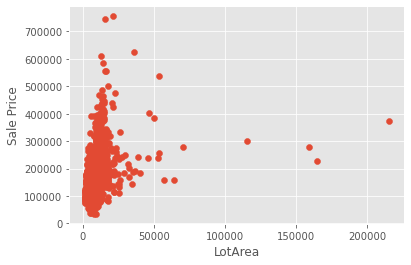

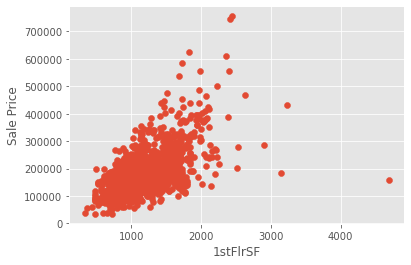

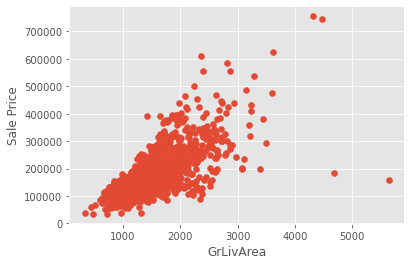

In [5]:
# Your code here 
for feat in features:
    plt.scatter(x=features[feat], y=target)
    plt.xlabel(f'{feat}')
    plt.ylabel('Sale Price')
    plt.show()

In [6]:
# 1stFlSF and GrLivArea seem to be linearly related, with a few outliers
# LotArea and Sale Price have some linear relationship, but not as defined as the other two features

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return both the R-squared score and Root Mean Squared Error (RMSE) for two equal-sized arrays for the given true and predicted values 
    - Depending on your version of sklearn, in order to get the RMSE score you will need to either set `squared=False` or you will need to take the square root of the output of the `mean_squared_error` function - check out [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) or this helpful and related [StackOverflow post](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python)
    - The benefit of calculating RMSE instead of the Mean Squared Error (MSE) is that RMSE is in the same units at the target - here, this means that RMSE will be in dollars, calculating how far off in dollars our predictions are away from the actual prices for homes, on average

In [9]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Define the function
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r_squared = r2_score(y_true, y_predict)    
    
    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    root_MSE = mean_squared_error(y_true, y_predict, squared=False)
    
    # Return the score
    return r_squared, root_MSE
    


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.6870225614927066]

(0.9228556485355649, 0.6870225614927066)

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [10]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [12]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.5961521990414137, 55656.48543887347] - R2, RMSE

(0.5961521990414137, 55656.48543887347)

## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate RMSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

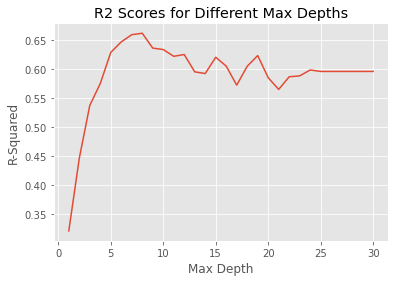

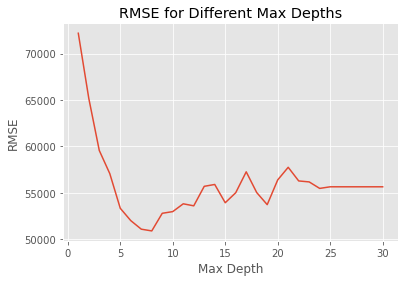

In [26]:
# Hyperparameter evaluation for Max Depth
depths = list(range(1, 31)) # create list of depths to check
r2_scores = [] # empty array to store scores of each iteration
RMSE_scores = [] # empty array to store scores of each iteration

# for each depth run the regressor and calc scores - store scores 
for depth in depths:
    regressor = DecisionTreeRegressor(random_state=45, max_depth=depth)
    regressor.fit(x_train, y_train)
    current_scores = performance(y_test, regressor.predict(x_test))
    r2_scores.append(current_scores[0])
    RMSE_scores.append(current_scores[1])
    
plt.plot(depths, r2_scores)
plt.title('R2 Scores for Different Max Depths')
plt.xlabel('Max Depth')
plt.ylabel('R-Squared')
plt.show()

plt.plot(depths, RMSE_scores)
plt.title('RMSE for Different Max Depths')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.show()

In [25]:
# r-squared increases with increases in max depth until ~7, same with RMSE
# Choosing a value between 6 and 7 is likely the optimal value

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

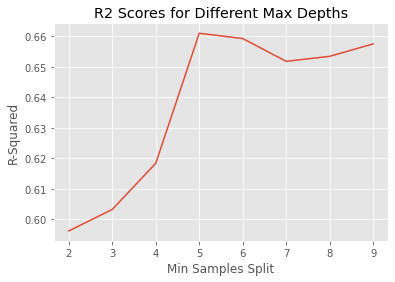

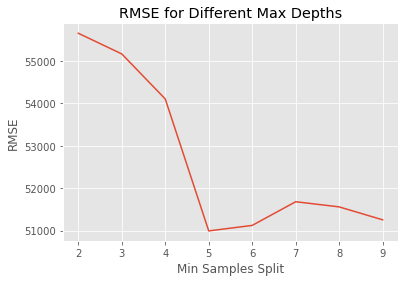

In [28]:
# Your code here 
min_samples_splits = list(range(2, 10)) # create list of depths to check
r2_scores = [] # empty array to store scores of each iteration
RMSE_scores = [] # empty array to store scores of each iteration

# for each depth run the regressor and calc scores - store scores 
for split in min_samples_splits:
    regressor = DecisionTreeRegressor(random_state=45, min_samples_split=split)
    regressor.fit(x_train, y_train)
    current_scores = performance(y_test, regressor.predict(x_test))
    r2_scores.append(current_scores[0])
    RMSE_scores.append(current_scores[1])
    
plt.plot(min_samples_splits, r2_scores)
plt.title('R2 Scores for Different Max Depths')
plt.xlabel('Min Samples Split')
plt.ylabel('R-Squared')
plt.show()

plt.plot(min_samples_splits, RMSE_scores)
plt.title('RMSE for Different Max Depths')
plt.xlabel('Min Samples Split')
plt.ylabel('RMSE')
plt.show()

In [29]:
# 5 appears to be the optimal

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [32]:
# Your code here 
regressor = DecisionTreeRegressor(random_state=45, max_depth=7, min_samples_split=5)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
performance(y_test, y_pred)

(0.6721318710553857, 50148.33498676983)

In [34]:
# have improved performance from an r2 of ~.59 to closer to .67 and RMSE has improved by ~$5000

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like `max_features` to find a more optimal version of the model 

In [35]:
# Your code here 

## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Ames Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 